In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 設定 data_path
dir_data = './data/'

In [2]:
# 讀取 csv 資料檔, 並觀察前幾筆資料 ( .head() )
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 觀察聘雇天數 'DAYS_EMPLOYED' 內的數值
app_train['DAYS_EMPLOYED']

In [ ]:
# 由於其他天數都是負值, 且聘僱日數不太可能是 365243 (大約 1000年), 算是異常數字 
# 因此我們推斷這份資料中, DAYS_EMPLOYED 的欄位如果是 365243, 應該是對應到空缺值, 繪圖時應該予以忽略
sub_df = app_train[app_train['DAYS_EMPLOYED'] != 365243]
sub_df

In [ ]:
# 如果直接畫散布圖 - 看不出任何趨勢或形態
plt.plot(sub_df['DAYS_EMPLOYED'] / (-365), sub_df['AMT_INCOME_TOTAL'], '.')
plt.xlabel('Days of employed (year)')
plt.ylabel('AMT_INCOME_TOTAL (raw)')
plt.show()
corr = np.corrcoef(sub_df['DAYS_EMPLOYED'] / (-365), sub_df['AMT_INCOME_TOTAL'])
print("Correlation: %.4f" % (corr[0][1]))

In [ ]:
# 通常可以對數值範圍較大的取 log: 發現雖然沒有相關，但是受雇越久的人，AMT_INCOME_TOTAL 的 variance 越小
plt.plot(sub_df['DAYS_EMPLOYED'] / (-365), np.log10(sub_df['AMT_INCOME_TOTAL'] ), '.')
plt.xlabel('Days of employed (year)')
plt.ylabel('AMT_INCOME_TOTAL (log-scale)')
plt.show()
corr = np.corrcoef(sub_df['DAYS_EMPLOYED'] / (-365), np.log10(sub_df['AMT_INCOME_TOTAL']))
print("Correlation: %.4f" % (corr[0][1]))

In [ ]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

In [ ]:

# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [3]:

# 觀察相關係數
app_train.corr()['TARGET']

SK_ID_CURR                   -0.002108
TARGET                        1.000000
CNT_CHILDREN                  0.019187
AMT_INCOME_TOTAL             -0.003982
AMT_CREDIT                   -0.030369
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.002704
AMT_REQ_CREDIT_BUREAU_WEEK    0.000788
AMT_REQ_CREDIT_BUREAU_MON    -0.012462
AMT_REQ_CREDIT_BUREAU_QRT    -0.002022
AMT_REQ_CREDIT_BUREAU_YEAR    0.019930
Name: TARGET, Length: 106, dtype: float64

In [4]:

# 觀察相關係數
corr_list = app_train.corr()['TARGET']

In [12]:
top_15 = corr_list.nlargest(15)
low_15 = corr_list.nsmallest(15)

print("Top 15 :")
print(top_15)

print("Low 15 :")
print(low_15)

Top 15 :
TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
Name: TARGET, dtype: float64
Low 15 :
EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
EL

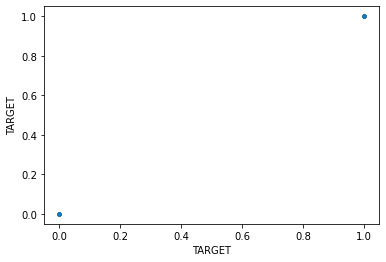

Correlation: 1.0000


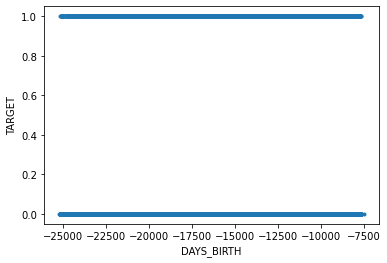

Correlation: 0.0782


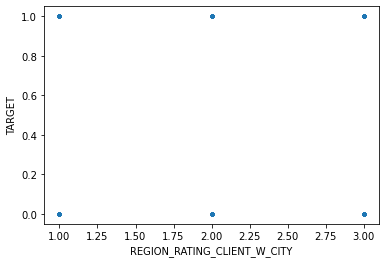

Correlation: 0.0609


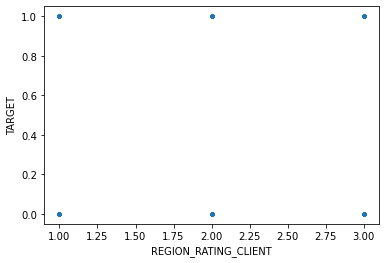

Correlation: 0.0589


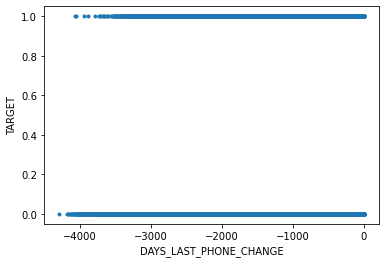

Correlation: nan


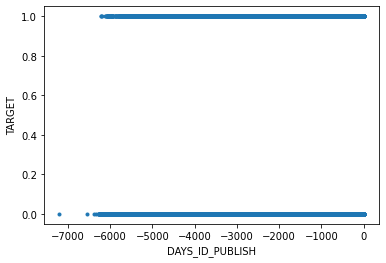

Correlation: 0.0515


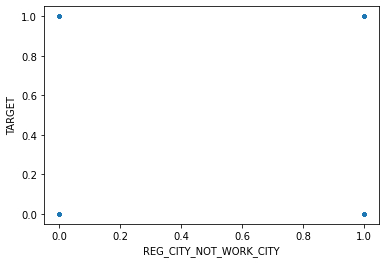

Correlation: 0.0510


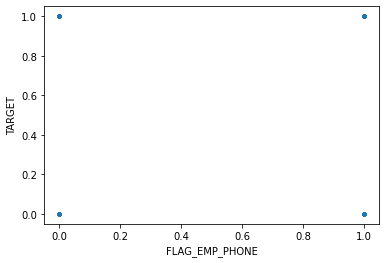

Correlation: 0.0460


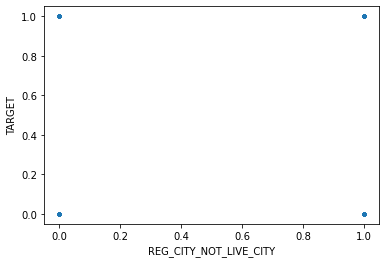

Correlation: 0.0444


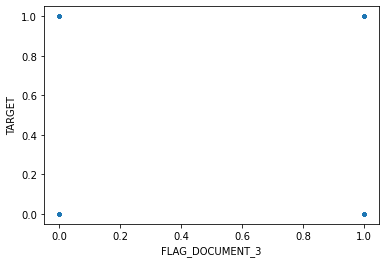

Correlation: 0.0443


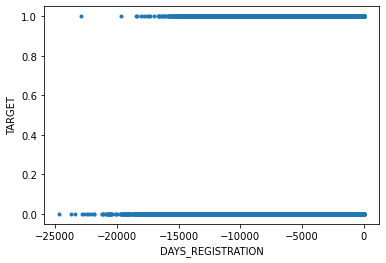

Correlation: 0.0420


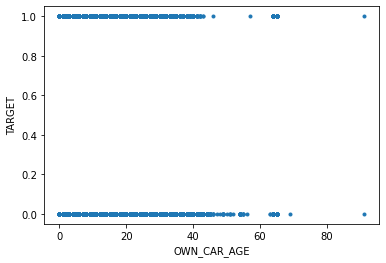

Correlation: nan


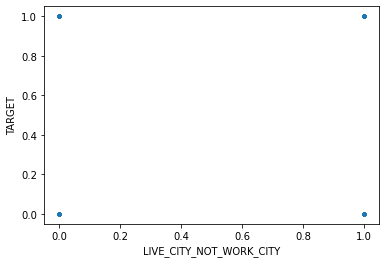

Correlation: 0.0325


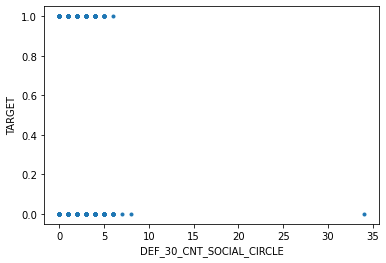

Correlation: nan


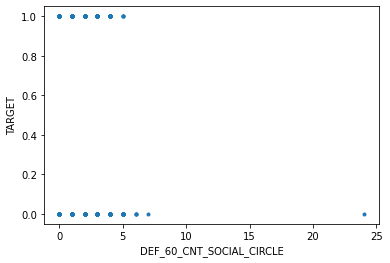

Correlation: nan


In [13]:
for i in range(len(top_15)):
    plt.plot(app_train[top_15.index[i]], app_train['TARGET'], '.')
    plt.xlabel(top_15.index[i])
    plt.ylabel('TARGET')
    plt.show()
    corr = np.corrcoef(app_train[top_15.index[i]], app_train['TARGET'])
    print("Correlation: %.4f" % (corr[0][1]))